In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
# Akash's plotting preferences
plt.rcParams['axes.facecolor'] = 'whitesmoke'
COLOR = 'darkslategray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = 'darkslategray'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.rcParams["font.family"] = "monospace"
mpl.rcParams['figure.figsize'] = [18, 14]
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [11]:
yearly_meals_lb = 30000 * 32 * 7
chicken_sandwich = 0.113 * 9.87 + 0.025 * 23.88 + 0.057 * 1.57
tofu_sandwich = 0.113 * 3.16 + 0.025 * 0.43 + 0.057 * 1.57

In [12]:
scenario_to_co2eq_per_item = {
    "100:0": chicken_sandwich,
    "75:25": 0.75 * chicken_sandwich + 0.25 * tofu_sandwich,
    "50:50": 0.50 * chicken_sandwich + 0.50 * tofu_sandwich,
    "25:75": 0.25 * chicken_sandwich + 0.75 * tofu_sandwich,
    "0:100": tofu_sandwich,
}

scenario_to_co2eq = {
    i: j * yearly_meals_lb for i, j in zip(
        scenario_to_co2eq_per_item.keys(), scenario_to_co2eq_per_item.values()
    )
}

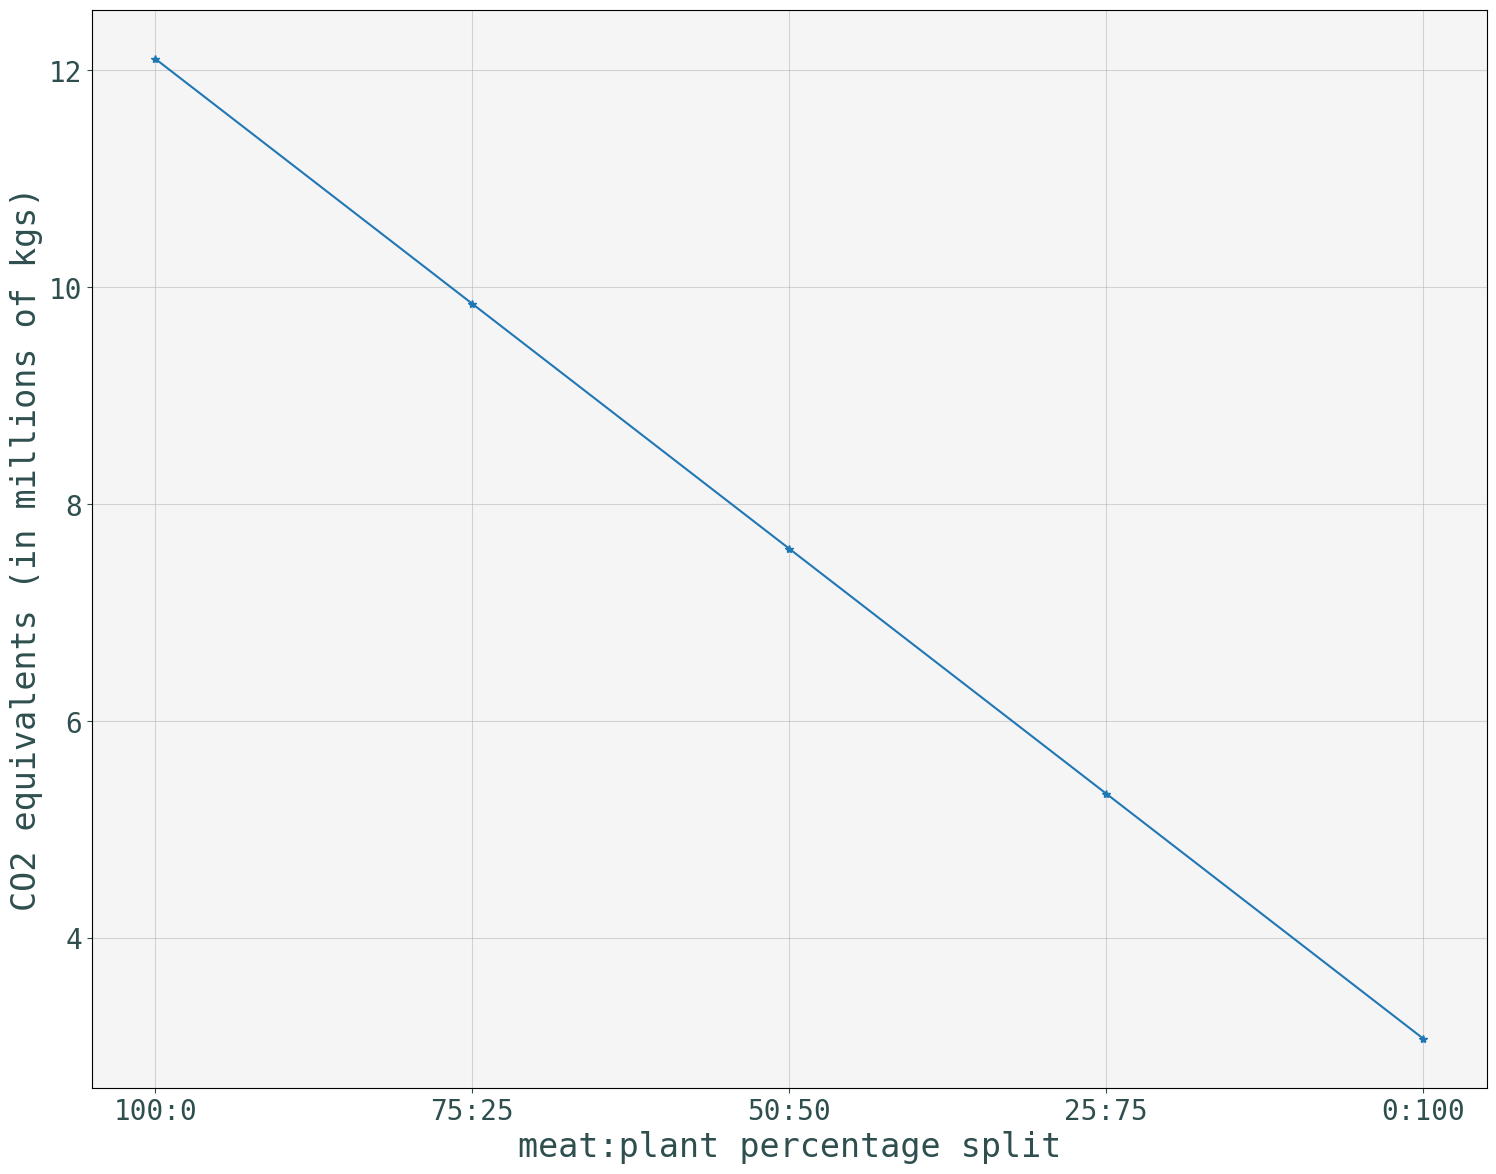

In [13]:
plt.plot(
    scenario_to_co2eq.keys(), 
    [i / 1e6 for i in scenario_to_co2eq.values()],
    marker="*",
)

plt.xlabel("meat:plant percentage split")
plt.ylabel("CO2 equivalents (in millions of kgs)")
plt.grid(alpha=0.5)
plt.show()

In [14]:
# computing the contribution of chicken and tofu to each scenario
chicken_contribution = {
    "100:0": 1.0 * chicken_sandwich,
    "75:25": 0.75 * chicken_sandwich,
    "50:50": 0.50 * chicken_sandwich,
    "25:75": 0.25 * chicken_sandwich,
    "0:100": 0.0 * chicken_sandwich,
}

tofu_contribution = {
    "100:0": 0.0 * tofu_sandwich,
    "75:25": 0.25 * tofu_sandwich,
    "50:50": 0.50 * tofu_sandwich,
    "25:75": 0.75 * tofu_sandwich,
    "0:100": 1.0 * tofu_sandwich,
}

# multiplying by yearly_meals_lb to get total CO2eq emissions
chicken_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in chicken_contribution.items()}
tofu_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in tofu_contribution.items()}


In [52]:
scenarios = list(scenario_to_co2eq.keys())

# adding the chicken and tofu contributions for each scenario
# converting each to MT CO2eq
chicken_values = [chicken_co2eq[scenario] / 1e3 for scenario in scenarios] 
tofu_values = [tofu_co2eq[scenario] / 1e3 for scenario in scenarios]

# creating the bar chart for the chicken sandwich
plt.bar(scenarios, chicken_values, label='Chicken sandwich', color="darkred", 
        edgecolor="black")

# stacking the two bars
plt.bar(scenarios, tofu_values, bottom=chicken_values, label='Tofu sandwich', 
        color="papayawhip", edgecolor="black")

# adding labels and title
plt.xlabel("Meat:Plant percentage split")
plt.ylabel(r"$\mathrm{CO_{2}}$ equivalent of emissions (in metric tons)")
plt.title("A Fermi estimate of the potential reduction in \n GHG emissions from "
          "food at the University of Arizona")
plt.legend(fontsize=24)

# Adding grid for better readability
plt.grid(alpha=0.5)
plt.ylim(0, 13000)

plt.savefig("./plots/fermi_estimate_food_UA.png", dpi=600,
            bbox_inches="tight")

NameError: name 'scenario_to_co2eq' is not defined

In [9]:
combined_estimated_emissions = [i + j for i, j in zip(chicken_values, tofu_values)]

In [10]:
for i in range(1, 5):
    percent_reduction = np.round(
        (100 * np.abs(combined_estimated_emissions[i] - combined_estimated_emissions[0]) / combined_estimated_emissions[0]), 
        2
    )
    
    print(
        f"Potential reduction in GHG emissions going from {scenarios[0]} to "
        f"{scenarios[i]} meat-to-plant ratio: "
        f"{percent_reduction}%."
    )

Potential reduction in GHG emissions going from 100:0 to 75:25 meat-to-plant ratio: 18.65%.
Potential reduction in GHG emissions going from 100:0 to 50:50 meat-to-plant ratio: 37.31%.
Potential reduction in GHG emissions going from 100:0 to 25:75 meat-to-plant ratio: 55.96%.
Potential reduction in GHG emissions going from 100:0 to 0:100 meat-to-plant ratio: 74.62%.


In [85]:
yearly_meals_lb = 30000 * 32 * 7
chicken_sandwich = 0.113 * 660 + 0.025 * 5605 + 0.057 * 648
tofu_sandwich = 0.113 * 149 + 0.025 * 4134 + 0.057 * 648
# tofu_sandwich = 0.113 * 149 + 0.025 * 2452 + 0.057 * 648 

In [86]:
# computing the contribution of chicken and tofu to each scenario
chicken_contribution = {
    "100:0": 1.0 * chicken_sandwich,
    "75:25": 0.75 * chicken_sandwich,
    "50:50": 0.50 * chicken_sandwich,
    "25:75": 0.25 * chicken_sandwich,
    "0:100": 0.0 * chicken_sandwich,
}

tofu_contribution = {
    "100:0": 0.0 * tofu_sandwich,
    "75:25": 0.25 * tofu_sandwich,
    "50:50": 0.50 * tofu_sandwich,
    "25:75": 0.75 * tofu_sandwich,
    "0:100": 1.0 * tofu_sandwich,
}

# multiplying by yearly_meals_lb to get total CO2eq emissions
chicken_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in chicken_contribution.items()}
tofu_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in tofu_contribution.items()}

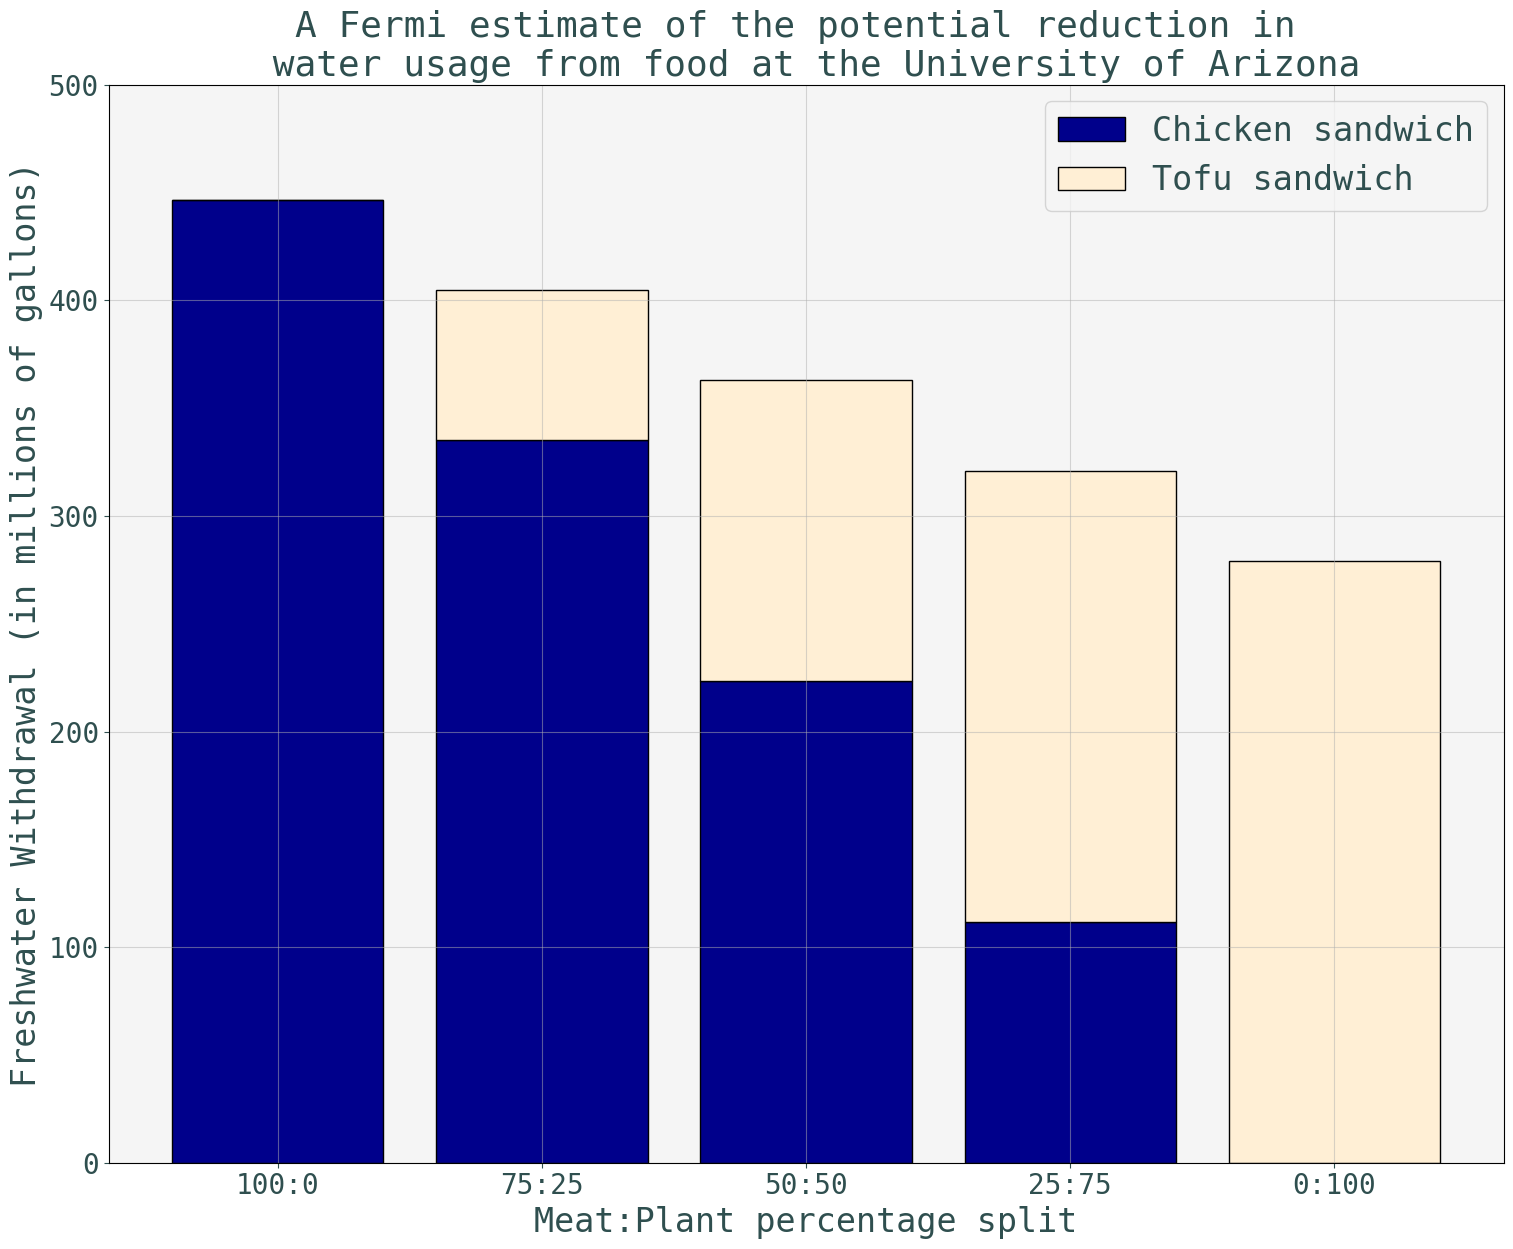

In [87]:
scenarios = list(tofu_contribution.keys())

# adding the chicken and tofu contributions for each scenario
# converting each to MT CO2eq
chicken_values = [chicken_co2eq[scenario] * 0.264172 / 1e6 for scenario in scenarios] 
tofu_values = [tofu_co2eq[scenario] * 0.264172 / 1e6 for scenario in scenarios]

# creating the bar chart for the chicken sandwich
plt.bar(scenarios, chicken_values, label='Chicken sandwich', color="darkblue", 
        edgecolor="black")

# stacking the two bars
plt.bar(scenarios, tofu_values, bottom=chicken_values, label='Tofu sandwich', 
        color="papayawhip", edgecolor="black")

# adding labels and title
plt.xlabel("Meat:Plant percentage split")
plt.ylabel("Freshwater Withdrawal (in millions of gallons)")
plt.title("A Fermi estimate of the potential reduction in \n water usage from "
          "food at the University of Arizona")
plt.legend(fontsize=24)

# adding grid for better readability
plt.grid(alpha=0.5)
plt.ylim(0, 500)
#
plt.savefig("./plots/fermi_estimate_water_UA.png", dpi=600,
            bbox_inches="tight")

In [88]:
combined_estimated_emissions = [i + j for i, j in zip(chicken_values, tofu_values)]

In [89]:
for i in range(1, 5):
    percent_reduction = np.round(
        (100 * np.abs(combined_estimated_emissions[i] - combined_estimated_emissions[0]) / combined_estimated_emissions[0]), 
        2
    )
    
    print(
        f"Potential reduction in GHG emissions going from {scenarios[0]} to "
        f"{scenarios[i]} meat-to-plant ratio: "
        f"{percent_reduction}%."
    )

Potential reduction in GHG emissions going from 100:0 to 75:25 meat-to-plant ratio: 9.39%.
Potential reduction in GHG emissions going from 100:0 to 50:50 meat-to-plant ratio: 18.78%.
Potential reduction in GHG emissions going from 100:0 to 25:75 meat-to-plant ratio: 28.17%.
Potential reduction in GHG emissions going from 100:0 to 0:100 meat-to-plant ratio: 37.56%.


In [36]:
food_price = pd.read_csv("./food_prices_pb_vs_other.csv")

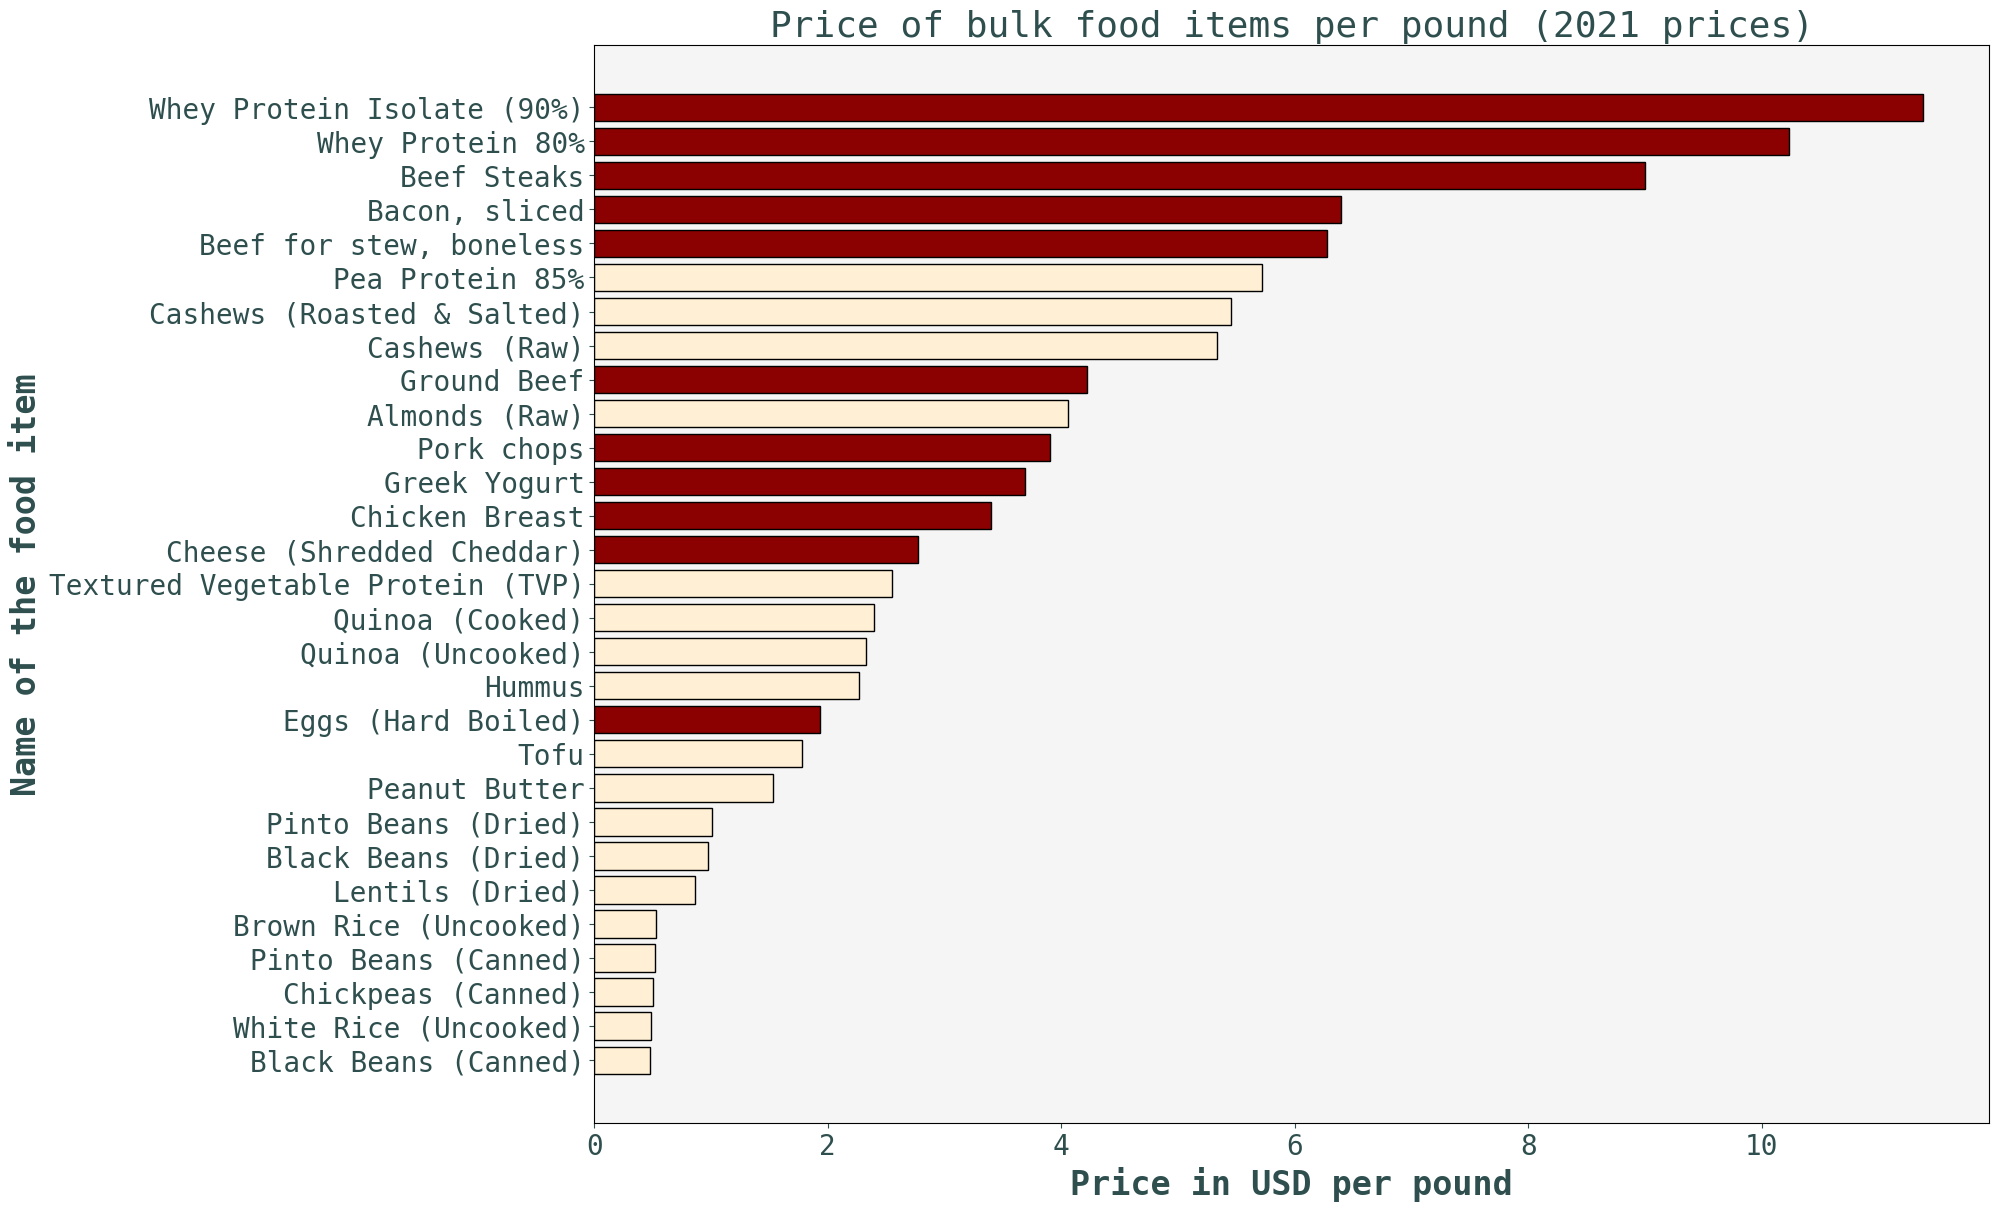

In [41]:
food_price_subset = {
    'PB': food_price["PB?"],
    'food': food_price["Food Item"],
    'price_per_lb': [float(i[1:]) for i in food_price["Price per pound"]],
}

food_price_subset = pd.DataFrame(food_price_subset)

food_price_sorted = food_price_subset.sort_values('price_per_lb', ascending=True)
colors = ['papayawhip' if pb == 'Vegan' else 'darkred' for pb in food_price_sorted['PB']]

plt.barh(food_price_sorted["food"], food_price_sorted["price_per_lb"], 
         edgecolor="black", color=colors)
plt.xlabel("Price in USD per pound", fontweight="bold")
plt.ylabel("Name of the food item", fontweight="bold")
plt.title("Price of bulk food items per pound (2021 prices)")
plt.savefig("./plots/price_per_pound.png", dpi=600, bbox_inches="tight")